<h1 style="font-family:verdana;"> <center>👫 Gender-Distribution in Data Science 👩👨</center> </h1>


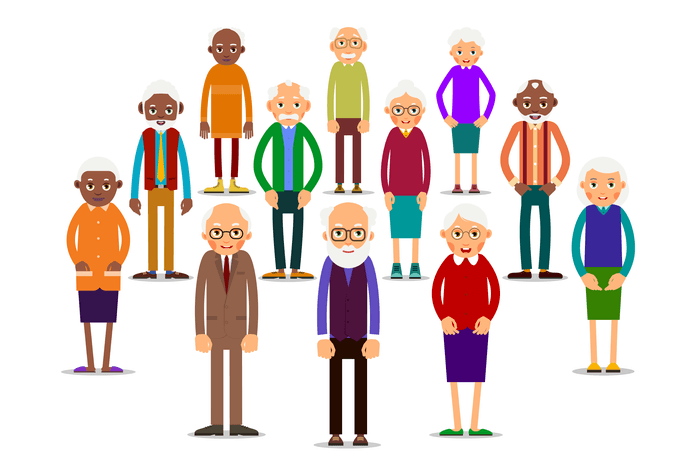

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
     &nbsp; In this notebook we are going to see the participation of Man and Woman in Data Science.As Data Science is one of growing filed and its become more important to know how many percenatge of man and woman are participating.Doing this kind of analysis gives us the clear ideas and based on that we can help the comunity to grow by keeping parity.
</div>

<p style="font-size:15px; font-family:verdana;">We will start with the <span style="color:#331d00;">Basic Data Analysis and Visualization</span><p>

<h1 id="basics" style="font-family:verdana;color:#3F000F;"> 
    <center>1. Load and Read Dataset 
        <a class="anchor-link"></a>
    </center>
</h1>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 style="font-family:verdana;color:#FF7722;">
        1.1 Load Library <i></i>
    </h1>
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 style="font-family:verdana;color:#FF7722;">
        1.2 Read DataSet <i></i>
    </h1>
</div>

In [ ]:
df=pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv",low_memory=False)
df=df[1:] #Remove first row as i contains longer text
df.head()

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 style="font-family:verdana;color:#FF7722;">
        1.3 Helper Functions <i></i>
    </h1>
</div>

In [ ]:
def country_cleaning(x):
    '''This Function truncated the longer countries' names to the short names..
    '''
    if x=='United States of America':
        x='USA'
    elif x=='United Kingdom of Great Britain and Northern Ireland':
        x='UK'
    elif x=='Iran, Islamic Republic of...':
        x='Iran'
    elif x=='Hong Kong (S.A.R.)':
        x='Hong Kong'
    elif x=='I do not wish to disclose my location':
        x='Other'
    elif x=='United Arab Emirates':
        x='UA'
    elif x=='Viet Nam':
        x='Vietnam'
    return x

def degree_cleaning(x):
    '''This Function truncated the longer degree' names to the short names..
    '''
    if x=='Some college/university study without earning a bachelor’s degree':
        x='College without degree'
    elif x=='I prefer not to answer':
        x='No-response'
    elif x=='No formal education past high school':
        x='After high school'
    return x
def code_cleaning(x):
    if x=='I have never written code':
        x='0years'
    elif x=='I do not use machine learning methods':
        x='No experience'
    return x
#we use map function here to process the countries names
df['Q3']=df['Q3'].map(lambda x: country_cleaning(x))
df['Q4']=df['Q4'].map(lambda x: degree_cleaning(x))
df['Q6']=df['Q6'].map(lambda x: code_cleaning(x))
df['Q15']=df['Q15'].map(lambda x: code_cleaning(x))
#########################################################

<h1 id="basics" style="font-family:verdana;color:#3F000F;"> 
    <center>2.Age Distribution 
        <a class="anchor-link"></a>
    </center>
</h1>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 style="font-family:verdana;color:#FF7722;">
        2.1 Age Distribution in 2021 <i></i>
    </h1>
        <br>Let's see first how many peoples are participating from the different age groups in the survey:
</div>

In [ ]:
#Define the figure size
fig,ax1=plt.subplots(1,1,figsize=(24,8))
#drwaing barplot
sns.barplot(x=df['Q1'].value_counts().index,y=df['Q1'].value_counts().values,color="#314a48",label="Age_Distribution")
#Mentioning the text in bar plot
for index,value in enumerate(df['Q1'].value_counts().values):
    ax1.annotate(value,xy=(index,value+100),ha="center",va="center",fontsize=18)
#ploting the mean line
sns.lineplot(x=df['Q1'].value_counts().index,y=df['Q1'].value_counts().values.mean(),color="black",label="Age_Distribution_mean")
plt.legend(fontsize=26)
plt.xlabel("Age_Group",fontsize=20)
plt.ylabel("Age_count",fontsize=20)
plt.title("Age In 2021",fontsize=30)
plt.show()

<ol>
<li>Age Group from 18-29 is mostly active in 2021 <br></li>
            <li>40+ age peoples participation is less than mean of the total population<br></li>
        </ol>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 style="font-family:verdana;color:#FF7722;">
        2.2 Age Distribution Across Gender <i></i>
    </h1>
        <br>Which age group of man and woman are more participating in Data Science?
</div>

In [ ]:
#create empty dict to store the population regarding age group of man and woman
gender_dict={}
#loop through gender column
for gender in df['Q2'].value_counts().index:
    gender_dict[gender]=df[df['Q2']==gender]['Q1'].value_counts()
#create dataframe from dictionary
age_df=pd.DataFrame(gender_dict)
#change the index name
age_df.index.rename("Age_Group",inplace=True)
#display the datafarme
display(age_df)

In [ ]:
#Define the figure size
fig,ax1=plt.subplots(1,1,figsize=(24,8))
#Plot the bar chart in same axis
ax1.bar(age_df.index,age_df['Man'],color="#2e5f81",label="Man")
ax1.bar(age_df.index,age_df['Woman'],color="#741b47",label="Woman")
#Adjust the text in bar chart
for index in age_df.index:
    ax1.annotate(age_df["Man"].loc[index],xy=(index,age_df["Man"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(age_df["Woman"].loc[index],xy=(index,age_df["Woman"].loc[index]-100),ha="center",va="center",fontsize=18)
plt.legend(fontsize=26)
plt.xlabel("Age_Group",fontsize=20)
plt.ylabel("Age_count",fontsize=20)
plt.title("Age Distribution across gender in 2021",fontsize=30)
plt.show()

<ol>
<li>Women from 18-29 are mostly active whereas men from 25-29 are mostly active in 2021.We can conclude that younger women are more interesting to take part in data science which really a good sign🦾👩.<br></li>
            <li>As younger women are trying to do more participation but women after 40 years have very less participation..<br></li>
        </ol>

<h1 id="basics" style="font-family:verdana;color:#3F000F;"> 
    <center>3.Countries-Analysis
        <a class="anchor-link"></a>
    </center>
</h1>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 style="font-family:verdana;color:#FF7722;">
        3.1 Top-10 Countries in 2021 <i></i>
    </h1>
        <br>Let's see first what are the top-10 countries actively participating:
</div>

In [ ]:
#df['Q3'].value_counts()
df_=df['Q3'].value_counts().head(10)
#Draw the pie chart
labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Top 10 Countries",fontsize=26,color="#a52a2a")
plt.show()

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 style="font-family:verdana;color:#FF7722;">
        3.2 Gender Participation<i></i>
    </h1>
        <br>
</div>

In [ ]:
def gender_across_columns(col_name):
    '''This function returns the ratio of men and women participation in data science for any column in the data frame.
    By using this function we can plot a bar chart and can visualize the distribution of men and women.
    '''
    #create the dictionary
    pop={}
    #iterate through the columns
    for index in df[col_name].value_counts().index:
        pop[index]=df[df[col_name]==index]['Q2'].value_counts()
    _df=pd.DataFrame(pop)
    #create dataframe which will calculate ratio of men and women
    new_df=_df.T
    #select only men and women from 5 categories
    new_df=new_df[['Man','Woman']]
    #find the sum=men+women
    new_df['sum']=new_df.sum(axis=1)
    #calculate the ratio
    new_df=new_df.T/new_df['sum']
    #remove the sum row from dataframe
    new_df=new_df[:-1]
    #adjust the dataframe
    new_df_ratio=new_df.T
    return new_df_ratio

In [ ]:
df3=gender_across_columns('Q3').head(10)
df4=gender_across_columns('Q4')
df5=gender_across_columns('Q5').head(10)
df6=gender_across_columns('Q6')


fig, ax1 = plt.subplots(4,figsize=(20,30))
ax1[0].barh(df3.index,df3['Man'],alpha=0.7,label='Man',color='#001817')
ax1[0].barh(df3.index,df3['Woman'],alpha=0.7,label='Woman',color='#326e6d',left=df3['Man'])

for index in df3.index:
    ax1[0].annotate(str(round(df3['Man'].loc[index],2))+'%',xy=(df3['Man'].loc[index]/2,index),fontsize=12,color='#000000')
    ax1[0].annotate(str(round(df3['Woman'].loc[index],2))+'%',xy=(df3['Man'].loc[index]+df3['Woman'].loc[index]/2,index),fontsize=12,color='#000000')
ax1[0].set_xticks([])
ax1[0].set_yticklabels(df3.index,fontsize=18)
ax1[0].set_title("Gender Distribution Across Countries",fontsize=25)
ax1[0].legend(loc ='upper left',fontsize=15)

####################################################################
ax1[1].barh(df5.index,df5['Man'],alpha=0.7,label='Man',color='#0f2953')
ax1[1].barh(df5.index,df5['Woman'],alpha=0.7,label='Woman',color='#530f29',left=df5['Man'])

for index in df5.index:
    ax1[1].annotate(str(round(df5['Man'].loc[index],2))+'%',xy=(df5['Man'].loc[index]/2,index),fontsize=12,color='#000000')
    ax1[1].annotate(str(round(df5['Woman'].loc[index],2))+'%',xy=(df5['Man'].loc[index]+df5['Woman'].loc[index]/2,index),fontsize=12,color='#000000')
ax1[1].set_xticks([])
ax1[1].set_yticklabels(df5.index,fontsize=18)
ax1[1].set_title("Gender Distribution Across Profession",fontsize=25)
ax1[1].legend(loc ='upper left',fontsize=15)
#######################################################################################
ax1[2].barh(df4.index,df4['Man'],alpha=0.7,label='Man',color='#120309')
ax1[2].barh(df4.index,df4['Woman'],alpha=0.7,label='Woman',color='#0f5339',left=df4['Man'])

for index in df4.index:
    ax1[2].annotate(str(round(df4['Man'].loc[index],2))+'%',xy=(df4['Man'].loc[index]/2,index),fontsize=12,color='#000000')
    ax1[2].annotate(str(round(df4['Woman'].loc[index],2))+'%',xy=(df4['Man'].loc[index]+df4['Woman'].loc[index]/2,index),fontsize=12,color='#000000')
ax1[2].set_xticks([])
ax1[2].set_yticklabels(df4.index,fontsize=18)
ax1[2].set_title("Gender Distribution Across Education",fontsize=25)
ax1[2].legend(loc ='upper left',fontsize=15)
#########################################################

ax1[3].barh(df6.index,df6['Man'],alpha=0.7,label='Man',color='#663a00')
ax1[3].barh(df6.index,df6['Woman'],alpha=0.7,label='Woman',color='#ffbd66',left=df6['Man'])

for index in df6.index:
    ax1[3].annotate(str(round(df6['Man'].loc[index],2))+'%',xy=(df6['Man'].loc[index]/2,index),fontsize=12,color='#000000')
    ax1[3].annotate(str(round(df6['Woman'].loc[index],2))+'%',xy=(df6['Man'].loc[index]+df6['Woman'].loc[index]/2,index),fontsize=12,color='#000000')
ax1[3].set_xticks([])
ax1[3].set_yticklabels(df6.index,fontsize=18)
ax1[3].set_title("Gender Distribution Across Coding Experience",fontsize=25)
ax1[3].legend(loc ='upper left',fontsize=15)

plt.show()

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="code">
        Across Countries
    </h1>
    <p>
        <ol>
            <ul>
                <li>
                    We can easily interpret more number of males are participating from Japan as well as less number of women compared to top 10 countries in Data Science.<br>
                    <li>
                     Women from India and the USA showed almost equal number participation.<br>
                      <li>
                     Women from Pakistan, Brazil, China, the UK, Nigeria, and Russia also showed less participation in Data Science.<br>
  
                          


<div style="font-family:verdana; word-spacing:1.5px;">
    <h2 id="code">
        Across Professsion
    </h2>
    <p>
        <ol>
            <ul>
                <li>
 Most of the women are currently not employed. It can be a reason for covid-19 as well but now the situation is changing and hope to see more participation next year.<br>
                    <li>
                     If we look at the Data Scientist position then we are far away from parity between men and women. This is really not a good sign. we all should help the community to make everyone grow in Data Science.<br>
                      <li>
                     I am happy to see the women are working as data analyst.I know the number is less but still good as Data Analyst is the first step to become Data Scientist.<br>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h2 id="code">
        Across Education
    </h2>
    <p>
        <ol>
            <ul>
                <li>
Many women are interested in pursuing Professional Doctorate compared to other professions but the same number of women are also not giving responses about their education.<br>
                   
                    


1. In these graphs, we can see the salary structure of Data scientists in different countries along with the number of participation of men and women.
               

<h1 id="basics" style="font-family:verdana;color:#3F000F;"> 
    <center>4.Basic Practice of Data Scientists
        <a class="anchor-link"></a>
    </center>
</h1>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="code">
        General Practice of Data Scientist
    </h1>
    <p> We are always interested to know about other people that how they learn data science and make career transitions in data science. So why not analyze how the man and woman are learning data science and doing great work as well.
        In this section we are going to analyze,<br><span style="color:#331d00;"> what are the Mooc courses people doing and the enrollment ratio of men and women in different MOOC Courses.</span>
       <br> We also going to analyze <span style="color:#331d00;">which one is the popular IDE people are using to perform the exercise and many more.</span>
     
        

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="code">
        Popular Integrated Development IDE's
    </h1>

<p>All the beginners in Data Science think about which development environment they should choose to practice the data science techniques.
we have many IDE some are beginners friendly and some are useful for the experienced user but which one to choose is a little bit hard to decide. So why not in this exercise we analyze what the kagglers are choosing to practice the best development IDE.
Also, we are more interested in seeing how males and females are using different development IDE.
So Let's start...</p>

In [ ]:
df_man=df[df['Q2']=='Man']
df_woman=df[df['Q2']=='Woman']

In [ ]:
import operator
def general_practices(question_number,df,df_man,df_woman):
    gp,gp_man,gp_woman={},{},{}
    col_list=[]
    for i in df.columns:
        if len(question_number)==2:
            if i[0:2]==question_number:
                col_list.append(i)
        else:
            if i[0:3]==question_number:
                col_list.append(i)
    n=len(col_list)
    for i in range(n-1):
        index=df[question_number+'_Part_'+str(i+1)].value_counts().index[0]
        value=df[question_number+'_Part_'+str(i+1)].value_counts().values[0]
        
        ####################################################
        index_man=df_man[question_number+'_Part_'+str(i+1)].value_counts().index[0]
        value_man=df_man[question_number+'_Part_'+str(i+1)].value_counts().values[0]
        
        ######################################################
        index_woman=df_woman[question_number+'_Part_'+str(i+1)].value_counts().index[0]
        value_woman=df_woman[question_number+'_Part_'+str(i+1)].value_counts().values[0]
        
        
        gp[index]=value
        gp_man[index_man]=value_man
        gp_woman[index_woman]=value_woman
    return gp,gp_man,gp_woman

In [ ]:
def adjust_dataframe(dictionary,question_name,name):
    data=pd.DataFrame(dictionary.items(),columns=[question_name,name])
    return data

def merge_three_dataframe(first_dataframe,second_dataframe,third_dataframe,common_column):
    return pd.merge(first_dataframe,second_dataframe,on=common_column).merge(third_dataframe,on=common_column)

def get_final_dataframe(data1,data2,data3,common_column):
    df_=merge_three_dataframe(data1,data2,data3,common_column)
    df_.index=df_[common_column]
    df_.drop(common_column,axis=1,inplace=True)
    return df_

df1=adjust_dataframe(general_practices('Q9',df,df_man,df_woman)[0],'IDE','Population')
df2=adjust_dataframe(general_practices('Q9',df,df_man,df_woman)[1],'IDE','Man')
df3=adjust_dataframe(general_practices('Q9',df,df_man,df_woman)[2],'IDE','Woman')


df_ide=get_final_dataframe(df1,df2,df3,'IDE')
df_ide=df_ide[:-1]

In [ ]:
df_ide.index=['Jupyter', ' RStudio ',
       ' Visual Studio ', ' VSCode', ' PyCharm ',
       '  Spyder  ', '  Notepad++  ', '  Sublime Text  ', '  Vim / Emacs  ',
       ' MATLAB ', ' Jupyter Notebook']

In [ ]:
df_lang=adjust_dataframe(general_practices('Q7',df,df_man,df_woman)[0],'language','Population')
df_lang_man=adjust_dataframe(general_practices('Q7',df,df_man,df_woman)[1],'language','Man')
df_lang_woman=adjust_dataframe(general_practices('Q7',df,df_man,df_woman)[2],'language','Woman')


df_language=get_final_dataframe(df_lang,df_lang_man,df_lang_woman,'language')
df_language=df_language[:-1]

In [ ]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(24,10))
ax1.plot(df_language.index,df_language['Man'],label='Man',color='blue',linestyle='--')
ax1.plot(df_language.index,df_language['Woman'],label='Woman',color='red',linestyle='--')
ax1.plot(df_language.index,df_language['Population'],label='Population',color='green',linestyle='solid')
ax1.set_xticks(df_language.index)
ax1.set_xticklabels(df_language.index,fontsize=18,rotation=90)
ax1.legend(fontsize=12)
ax1.set_title("Popular Languages",fontsize=26)

ax2.plot(df_ide.index,df_ide['Man'],label='Man',color='blue',linestyle='--')
ax2.plot(df_ide.index,df_ide['Woman'],label='Woman',color='red',linestyle='--')
ax2.plot(df_ide.index,df_ide['Population'],label='Population',color='green',linestyle='solid')
ax2.set_xticks(df_ide.index)
ax2.set_xticklabels(df_ide.index,fontsize=18,rotation=90)
ax2.legend(fontsize=12)
ax2.set_title("Popular Integrated Development IDE's",fontsize=26)

plt.show()

###########################################################################
df_recom=pd.DataFrame(df['Q8'].value_counts(ascending=True))
total=df['Q8'].value_counts(ascending=True).values.sum()
df_recom['perc']=df['Q8'].value_counts(ascending=True).values/total
####################################################################
fig,ax2=plt.subplots(figsize=(24,10))
ax2.barh(df['Q8'].value_counts(ascending=True).index,df['Q8'].value_counts(ascending=True).values,color="#741b47",label='Recommend Language')
for i, v in enumerate(df_recom['perc']):
    ax2.text(v, i, str("{0:.1f}%".format(v)), color='black', fontweight='bold', fontsize=14)
ax2.text(6000, 10, 
         'Python is the most popular language recommended to learn first', 
         fontsize=18, fontweight='bold', fontfamily='serif')
ax2.set_xticks([])
ax2.set_yticks(df['Q8'].value_counts(ascending=True).index)
ax2.set_yticklabels(df['Q8'].value_counts(ascending=True).index,fontsize=15)
ax2.legend()
ax2.set_title("Data Scientist Recommend Languages",fontsize=26)
plt.show()


<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="code">
        Insights:
    </h1>
    <br><span style="color:#000000
;">1) Most people are using Jupyter notebooks as Python is very easy to learn and more interesting thing is that any non-technical person can learn python in a few days and we know there are many students who do not have real-world experience so for them Jupyter is the best place to make their hands dirty.</span>
           <br><span style="color:#000000
;">2) There are old fights between Python user and R user and in 2021 many peoples are more familiar with jupyter compared to R-studio.</span>
           <br><span style="color:#000000
;">3) I do not think SQL will be the second most used language after python but it's also true we should learn one language which can help us to manage Databases to store data and SQL is really a great language that every Data Scientist should know.</span>
       <br><span style="color:#000000
;">4) If we put our attention to pycharm and VS code then people are using more VS code in their professional life as it is more compatible with other languages,PyChram is really good and has a good reach in coming years.</span>
<br><span style="color:#000000
;">5)  Julia and shift are new languages and people are not aware of them much or can say not used to in great extent but they are great in scientific programming due to their speed.</span>
<br><span style="color:#000000
;">6) Look like Matlab will going to disappear.</span>
    
    
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;color:#842f37">
    📌 <b>Conclusion:</b> <br>Jupyter is more famous among development IDE compared to others IDE's and similar python is famous language.<br>
   

</div>

 
<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="code">
        Popular Hosted Noebooks and Computing Plateform
    </h1>

<p>When we started our journey in data science we start thinking about which computing platform to use or how many different kinds of notebooks are available?. So in this analysis, we are going to see which computing platform is famous and what are the choice of man and woman...</p>

In [ ]:
df_host=adjust_dataframe(general_practices('Q10',df,df_man,df_woman)[0],'HOST','Population')
df_host_man=adjust_dataframe(general_practices('Q10',df,df_man,df_woman)[1],'HOST','Man')
df_host_woman=adjust_dataframe(general_practices('Q10',df,df_man,df_woman)[2],'HOST','Woman')


df_host_notebooks=get_final_dataframe(df_host,df_host_man,df_host_woman,'HOST')
df_host_notebooks=df_host_notebooks.sort_values(by='Population', ascending=True)
df_host_notebooks

In [ ]:
def horizontal_barchart(ax,data,col_name,color,title):
    total=data[col_name].sum()
    data['percentage']=round((data[col_name]/total)*100,2)
    ax.barh(data.index,data[col_name].values,color=color)
    for index in data['percentage'].index:
        ax.annotate(str(data['percentage'].loc[index])+'%',xy=(data['percentage'].loc[index].max(),index),fontsize=15,color='black', fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks(data.index)
    ax.set_yticklabels(data.index,fontsize=20)
    ax.legend()
    ax.set_title(title,fontsize=20,fontweight='bold')
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['bottom'].set_visible(False)


In [ ]:

def pie_chart(colors,ax,data,col_name,title):
    '''This function generate pie-chart which is useful to do univariate analysis dataframe columns
    Parameters:
        colors:we can pass the colors 
        ax: which axis we want to show pie-chart
        data: dataframe
        col_name: pass the column name which we need to analyze
    '''
    #Get the labes of dataframe column
    index=data[col_name].value_counts().index.tolist()
    #Get the values
    value=data[col_name].value_counts().values.tolist()
    #convert in dictionary
    value_dict = dict(zip(index, value))
    #if None and Other key are present then we ignore in this case
    value_dict = {key: value for key, value in value_dict.items() if (key!='None') & (key!='Other')}
    #set the explode by knowing the len of keys
    explode=tuple([0.05]*len(value_dict.keys()))
    #draw pie chart
    ax.pie(value_dict.values(), explode=explode, colors=colors, startangle=90, labels=value_dict.keys(),
        autopct='%1.0f%%', pctdistance=0.8,textprops={'fontsize': 16})
    #fill the center circle of pie-chart
    centre_circle = plt.Circle((0,0),0.65,fc='white')
    ax.add_artist(centre_circle)
    ax.axis('equal')
    ax.set_title(title,fontsize=20,fontweight='bold')

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(24,10))
fig.suptitle("- Best Platform-", size = 26, color ="#00284b", weight='bold')
colors = ["#4d0000","#670000","#800000","#9a0000"]
pie_chart(colors,ax2,df,'Q11',"Choice of Computing Platform")
horizontal_barchart(ax1,df_host_notebooks,'Population',"#008080","Choice of Notebooks")

1. Generally peoples are chossing Colab Notebooks and paralley Kaggle notebooks as well because in both of notebooks we can get good amount of RAM and having GPU accelerated with them.
2. According to me Dekstop are the best but generally, people are going with Laptop more because of compatibility.

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(24,10))
fig.suptitle("- Best Platform For Man -", size = 26, color ="#00284b", weight='bold')
colors = ["#003366","#194775","#325b84","#4c7093"]
pie_chart(colors,ax2,df_man,'Q11',"Choice of Computing Platform")
horizontal_barchart(ax1,df_host_notebooks,'Man',"#663300","Choice of Notebooks")

1. Men are choosing Colab and Kaggle notebooks more compared to others' notebooks.
2. Also, they also prefer to do work on laptops.

In [ ]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(24,10))
fig.suptitle("- Best Platform For Woman -", size = 26, color ="#00284b", weight='bold')
pie_chart(colors,ax2,df_woman,'Q11',"Choice of Computing Platform")
horizontal_barchart(ax1,df_host_notebooks,'Woman',"#006633","Choice of Notebooks")


1. I can see similar trends in women same as men.

what you think about it?

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;color:#842f37">
    📌 <b>Conclusion:</b> <br>Colab and Kaggle Notebooks are more famous and people are preferring to do work on laptop more compared to other's platform.<br>
   

</div>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="code">
        Popular Frameworks
    </h1>

<p>In this section we are going to perform analysis of Popular Frameworks like what are the visualization tools famous among gender distribution and what kind of machine learning frameworks are popular...</p>

In [ ]:
df_tool=adjust_dataframe(general_practices('Q14',df,df_man,df_woman)[0],'Tool','Population')
df_tool_man=adjust_dataframe(general_practices('Q14',df,df_man,df_woman)[1],'Tool','Man')
df_tool_woman=adjust_dataframe(general_practices('Q14',df,df_man,df_woman)[2],'Tool','Woman')


df_vis=get_final_dataframe(df_tool,df_tool_man,df_tool_woman,'Tool')
df_vis=df_vis.sort_values(by='Population', ascending=True)
df_vis

In [ ]:
df_ml=adjust_dataframe(general_practices('Q16',df,df_man,df_woman)[0],'ML','Population')
df_ml_man=adjust_dataframe(general_practices('Q16',df,df_man,df_woman)[1],'ML','Man')
df_ml_woman=adjust_dataframe(general_practices('Q16',df,df_man,df_woman)[2],'ML','Woman')


df_machine_learning=get_final_dataframe(df_ml,df_ml_man,df_ml_woman,'ML')
df_machine_learning=df_machine_learning.sort_values(by='Population', ascending=True)
df_machine_learning

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(42,18))
fig.suptitle("- Best Frameworks For Visualization -", size = 26, color ="#00284b", weight='bold')

horizontal_barchart(ax1,df_vis,'Population',"#003366","Choice of Population")
horizontal_barchart(ax2,df_vis,'Man',"#660000","Choice of Man")
horizontal_barchart(ax3,df_vis,'Woman',"#006633","Choice of Woman")

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(44,20))
fig.suptitle("- Best framework For Machine Learning -", size = 26, color ="#00284b", weight='bold')
horizontal_barchart(ax1,df_machine_learning,'Population','#bc1e1e',"Choice of Population")
horizontal_barchart(ax2,df_machine_learning,'Man',"#407294","Choice of Man")
horizontal_barchart(ax3,df_machine_learning,'Woman',"#7e1e7e","Choice of Woman")

In [ ]:
#Plot the bar chart 
def bar_chart(ax,data,col_name,label,color,y_label):
    ax.bar(data[col_name].value_counts().index,data[col_name].value_counts().values,color=color,label=label)
    #Adjust the text in bar chart
    for index in data[col_name].value_counts().index:
        ax.annotate(data[data[col_name]==index][col_name].value_counts().values[0],xy=(index,data[data[col_name]==index][col_name].value_counts().values[0]+35),ha="center",va="center",fontsize=18)
    ax.legend(fontsize=26)
    ax.set_xticklabels(data[col_name].value_counts().index,rotation=90,fontsize=18,fontweight='bold')
    ax.set_ylabel(y_label,fontsize=18,fontweight='bold')
    ax.set_yticks([])
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['bottom'].set_visible(False)


In [ ]:
#Define the figure size
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,10))
fig.suptitle("- Experience With ML Methods -", size = 26, color ="#00284b", weight='bold')
bar_chart(ax1,df_man,'Q15',"Man","#2e5f81","Number of years")
bar_chart(ax2,df_woman,'Q15',"Woman","#741b47","Number of years")
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,10))
fig.suptitle("- Experience With Writing Code -", size = 26, color ="#00284b", weight='bold')
bar_chart(ax1,df_man,'Q6',"Man","#2e5f81","Number of years")
bar_chart(ax2,df_woman,'Q6',"Woman","#741b47","Number of years")
plt.show()

In [ ]:
df_ml=adjust_dataframe(general_practices('Q17',df,df_man,df_woman)[0],'Algo','Population')
df_ml_man=adjust_dataframe(general_practices('Q17',df,df_man,df_woman)[1],'Algo','Man')
df_ml_woman=adjust_dataframe(general_practices('Q17',df,df_man,df_woman)[2],'Algo','Woman')


df_ml_algo=get_final_dataframe(df_ml,df_ml_man,df_ml_woman,'Algo')
df_ml_algo=df_ml_algo.sort_values(by='Population', ascending=True)
display(df_ml_algo)

df_cv=adjust_dataframe(general_practices('Q18',df,df_man,df_woman)[0],'cv','Population')
df_cv_man=adjust_dataframe(general_practices('Q18',df,df_man,df_woman)[1],'cv','Man')
df_cv_woman=adjust_dataframe(general_practices('Q18',df,df_man,df_woman)[2],'cv','Woman')


df_computer_vision=get_final_dataframe(df_cv,df_cv_man,df_cv_woman,'cv')
df_computer_vision=df_computer_vision.sort_values(by='Population', ascending=True)
display(df_computer_vision)

df_n=adjust_dataframe(general_practices('Q19',df,df_man,df_woman)[0],'nlp','Population')
df_n_man=adjust_dataframe(general_practices('Q19',df,df_man,df_woman)[1],'nlp','Man')
df_n_woman=adjust_dataframe(general_practices('Q19',df,df_man,df_woman)[2],'nlp','Woman')


df_nlp=get_final_dataframe(df_n,df_n_man,df_n_woman,'nlp')
df_nlp=df_nlp.sort_values(by='Population', ascending=True)
display(df_nlp)

In [ ]:
fig,ax1=plt.subplots(figsize=(34,10))
ax1.plot(df_ml_algo.index,df_ml_algo['Man'],label='Man',color='blue',linestyle='--')
ax1.plot(df_ml_algo.index,df_ml_algo['Woman'],label='Woman',color='red',linestyle='--')
ax1.plot(df_ml_algo.index,df_ml_algo['Population'],label='Population',color='green',linestyle='solid')
ax1.set_xticks(df_ml_algo.index)
ax1.set_xticklabels(df_ml_algo.index,fontsize=18,rotation=60)
ax1.legend(fontsize=12)
ax1.set_title("Popular Languages",fontsize=26)

<h1 id="basics" style="font-family:verdana;color:#3F000F;"> 
    <center>5.Salary-Analysis
        <a class="anchor-link"></a>
    </center>
</h1>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="code">
        Salary-Analysis of Data Scientists
    </h1>

*  In the below DataFrame we can see the number of participation of men and women working as Data Scientists from different countries
*   With help of this we can easily track the numbers so like in Nepal, Thailand showing Nan values means there are no participation of women who worked as Data Scientist in 2021😨

In [ ]:
#Data Scientist in Different Countries
df_country=df[df['Q5']=='Data Scientist']
data_scientist={}
for country_name in df_country['Q3'].value_counts().index:
    data_scientist[country_name]=df_country[df_country['Q3']==country_name]['Q2'].value_counts()
new_data=pd.DataFrame(data_scientist).T
new_data=new_data[['Man','Woman']]
new_data=new_data.T  
new_data

In [ ]:
def salary_of_datasciemtist(Data_Scientist_Data):
    #Salary of Man and Woman as Data Scientist in different Countries
    salary={}
    for name in country:
        salary[name]={}
        df1=Data_Scientist_Data[Data_Scientist_Data['Q3']==name]
        salary[name]['Man']=df1[df1['Q2']=='Man']['Q25'].value_counts()
        salary[name]['Woman']=df1[df1['Q2']=='Woman']['Q25'].value_counts()
        salary_df=pd.DataFrame(salary[name]).fillna(0)
        salary_df['sum']=salary_df.sum(axis=1)
        salary_df_ratio=salary_df.T/salary_df['sum']
        salary_df_ratio=salary_df_ratio[:-1]
        salary_df_ratio=salary_df_ratio.T
        salary[name]=salary_df_ratio
    return salary

In [ ]:
def data_scientist_visualization(country_name):
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(24,10))
    ax1.pie(new_data[country_name].values, labels=['Man','Woman'],colors=['#6f0000','#006080'],autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis("equal")
    ax1.set_title("Data Scientist Across Gender in"+':'+r"$\bf{" + country_name + "}$",fontsize=20)
    ax2.barh(salary_of_datasciemtist(df_country)[country_name].index,salary_of_datasciemtist(df_country)[country_name]['Man'],color='#6f0000',label='Man')
    ax2.barh(salary_of_datasciemtist(df_country)[country_name].index,salary_of_datasciemtist(df_country)[country_name]['Woman'],left=salary_of_datasciemtist(df_country)[country_name]['Man'],color='#006080',label='Woman')

    for index in salary_of_datasciemtist(df_country)[country_name].index:
        ax2.annotate(str(round(salary_of_datasciemtist(df_country)[country_name]['Man'].loc[index],3))+'%',xy=(salary_of_datasciemtist(df_country)[country_name]['Man'].loc[index]/2,index),ha='center',va='center',fontsize=10,color='#000000')
        ax2.annotate(str(round(salary_of_datasciemtist(df_country)[country_name]['Woman'].loc[index],2))+'%',xy=(salary_of_datasciemtist(df_country)[country_name]['Man'].loc[index]+salary_of_datasciemtist(df_country)[country_name]['Woman'].loc[index]/2,index),ha='center',va='center',fontsize=10,color='#000000')
    ax2.set_xticks([])
    ax2.set_yticklabels(salary_of_datasciemtist(df_country)[country_name].index,fontsize=18)
    ax2.set_title("Salary Distribution Across Gender in"+':'+r"$\bf{" + country_name + "}$",fontsize=20)
    ax2.legend(loc ='upper left',fontsize=15)
    plt.show()

In [ ]:
country=new_data.columns
for name in country[0:10]:
    if name!='Other':
        data_scientist_visualization(name)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;color:#842f37">
    📌 <b>Full Visualization Code:</b><br><br>I explained in my youtube channel,please check below link👇👇 and if you like then subscribe the channel as well👍. Thanks in Advances and please click on Let's Learn Together, it will take you to my youtube channel
    
<a href="https://www.youtube.com/watch?v=7_FzsdsY4Lk&list=PLwceW-ck1usezRrJ-adoYe3yTe3KxYCyK&index=4" target="_blank">Let's Learn Together!</a>

</div>


<a href="https://www.youtube.com/watch?v=7_FzsdsY4Lk&list=PLwceW-ck1usezRrJ-adoYe3yTe3KxYCyK&index=4" target="_blank">Let's Learn Together!</a>
